<a href="https://colab.research.google.com/github/guycoding/Machine-learning/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA Loading

In [4]:
df = pd.read_csv('FE_hourly.csv')

In [5]:
df.head(10)

,Datetime,FE_MW
0,2011-12-31 01:00:00,6222.0
1,2011-12-31 02:00:00,5973.0
2,2011-12-31 03:00:00,5778.0
3,2011-12-31 04:00:00,5707.0
4,2011-12-31 05:00:00,5691.0
5,2011-12-31 06:00:00,5803.0
6,2011-12-31 07:00:00,5995.0
7,2011-12-31 08:00:00,6307.0
8,2011-12-31 09:00:00,6548.0
9,2011-12-31 10:00:00,6786.0


In [33]:

df.index = pd.to_datetime(df.index)


In [7]:
df.head(10)
df.index

Index(['2011-12-31 01:00:00', '2011-12-31 02:00:00', '2011-12-31 03:00:00',
       '2011-12-31 04:00:00', '2011-12-31 05:00:00', '2011-12-31 06:00:00',
       '2011-12-31 07:00:00', '2011-12-31 08:00:00', '2011-12-31 09:00:00',
       '2011-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=62874)

<Axes: title={'center': 'Energy vs time'}, xlabel='Datetime'>

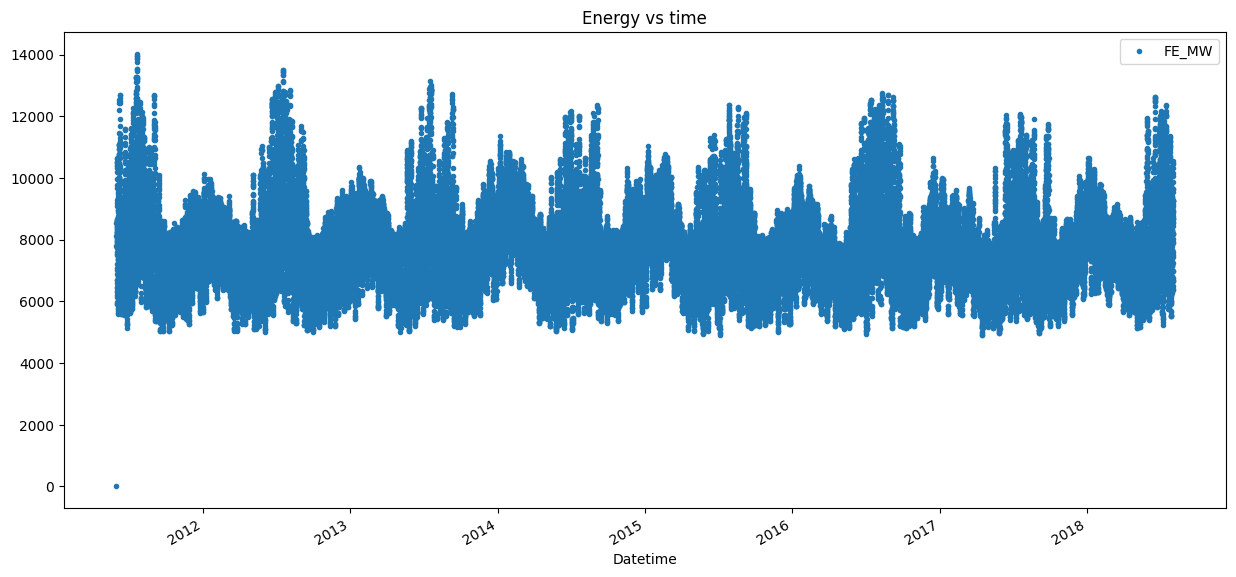

In [34]:
df.plot(figsize=(15,7), style="." ,title="Energy vs time")

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [43]:
def feature_engineer(df):
    df.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [44]:
df = feature_engineer(df)

In [45]:
y = df['FE_MW']
X = df.drop(['FE_MW'], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

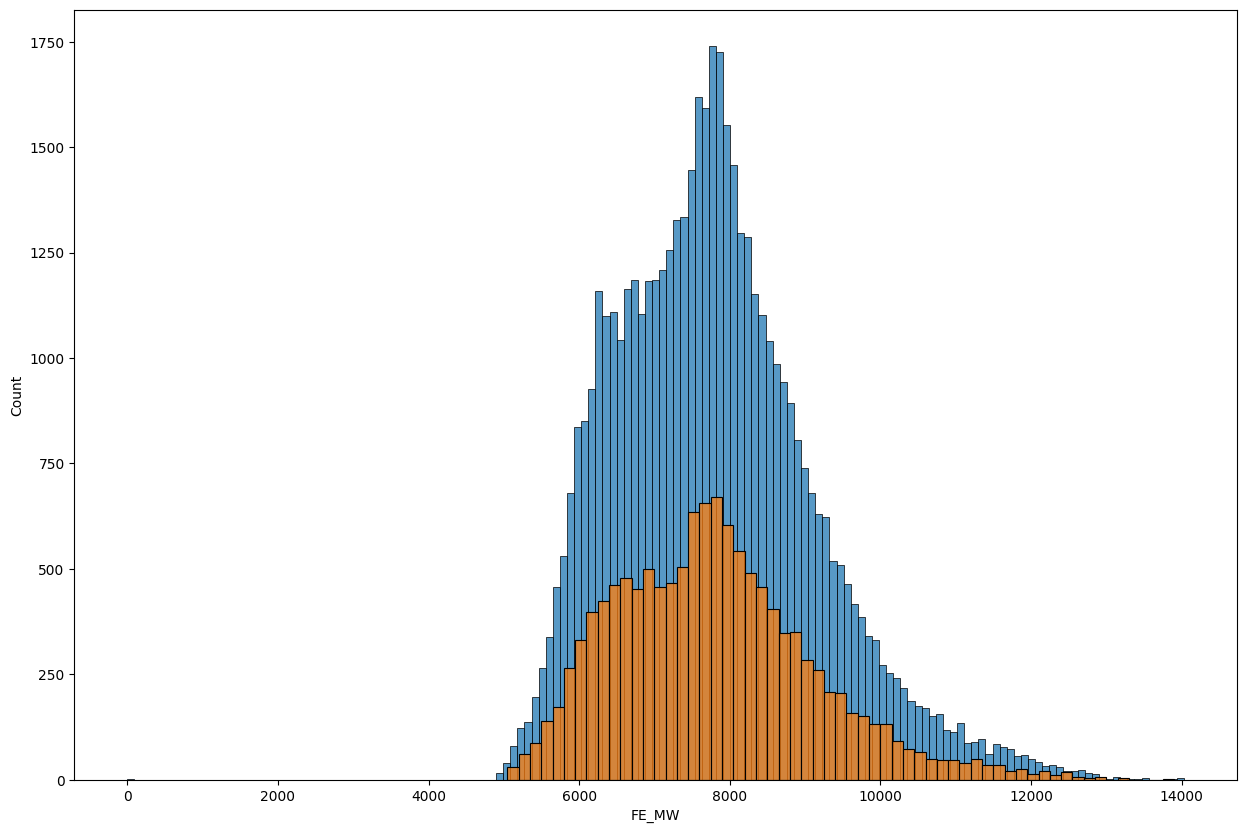

In [47]:
fig,ax =plt.subplots(figsize = (15,10))
sns.histplot(y_train, ax=ax)
sns.histplot(y_test, ax=ax)

plt.show()

FEATURE ENGINEERing

In [49]:
X_train.head()

,year,month,hour,dayofweek,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,
2017-12-15 07:00:00,2017,12,7,4,349,15,50
2014-03-14 04:00:00,2014,3,4,4,73,14,11
2017-04-10 19:00:00,2017,4,19,0,100,10,15
2011-09-25 04:00:00,2011,9,4,6,268,25,38
2013-07-15 21:00:00,2013,7,21,0,196,15,29


In [54]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=True)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])


[0]	validation_0-rmse:1326.79588
[1]	validation_0-rmse:1318.08232
[2]	validation_0-rmse:1309.46950
[3]	validation_0-rmse:1300.98998
[4]	validation_0-rmse:1292.61051
[5]	validation_0-rmse:1284.35797
[6]	validation_0-rmse:1276.22014
[7]	validation_0-rmse:1268.19297
[8]	validation_0-rmse:1260.29244
[9]	validation_0-rmse:1252.47583
[10]	validation_0-rmse:1244.75577
[11]	validation_0-rmse:1237.16266
[12]	validation_0-rmse:1229.67022
[13]	validation_0-rmse:1222.29397
[14]	validation_0-rmse:1215.00429
[15]	validation_0-rmse:1207.81101
[16]	validation_0-rmse:1200.71509
[17]	validation_0-rmse:1193.68840
[18]	validation_0-rmse:1186.82008
[19]	validation_0-rmse:1180.01147
[20]	validation_0-rmse:1173.30950
[21]	validation_0-rmse:1166.65806
[22]	validation_0-rmse:1160.07654
[23]	validation_0-rmse:1153.60502
[24]	validation_0-rmse:1147.23796
[25]	validation_0-rmse:1140.94927
[26]	validation_0-rmse:1134.76024


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:03:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[27]	validation_0-rmse:1128.63589
[28]	validation_0-rmse:1122.61684
[29]	validation_0-rmse:1116.66718
[30]	validation_0-rmse:1110.67745
[31]	validation_0-rmse:1104.77407
[32]	validation_0-rmse:1098.98619
[33]	validation_0-rmse:1093.28042
[34]	validation_0-rmse:1087.64920
[35]	validation_0-rmse:1082.23801
[36]	validation_0-rmse:1076.74459
[37]	validation_0-rmse:1071.34662
[38]	validation_0-rmse:1066.00576
[39]	validation_0-rmse:1060.83496
[40]	validation_0-rmse:1055.65333
[41]	validation_0-rmse:1050.51221
[42]	validation_0-rmse:1045.56082
[43]	validation_0-rmse:1040.55957
[44]	validation_0-rmse:1035.62937
[45]	validation_0-rmse:1030.93153
[46]	validation_0-rmse:1026.12979
[47]	validation_0-rmse:1021.40196
[48]	validation_0-rmse:1016.85994
[49]	validation_0-rmse:1012.26983
[50]	validation_0-rmse:1007.72064
[51]	validation_0-rmse:1003.36638
[52]	validation_0-rmse:998.93564
[53]	validation_0-rmse:994.58067
[54]	validation_0-rmse:990.39842
[55]	validation_0-rmse:986.13160
[56]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None,
             eval_set=[(                     year  month  hour  dayofweek  dayofyear  dayofmonth  \
Datetime                                                                   
2012-02-23 00:00:00  2012      2     0          3         54          23   
2017-08-07 10:00:00  2017      8    10          0        219           7   
2015-03-17 16:00:00  2015      3    16          1         7...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [55]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Mean Absolute Error:", mae)


Mean Absolute Error: 367.8148383138668


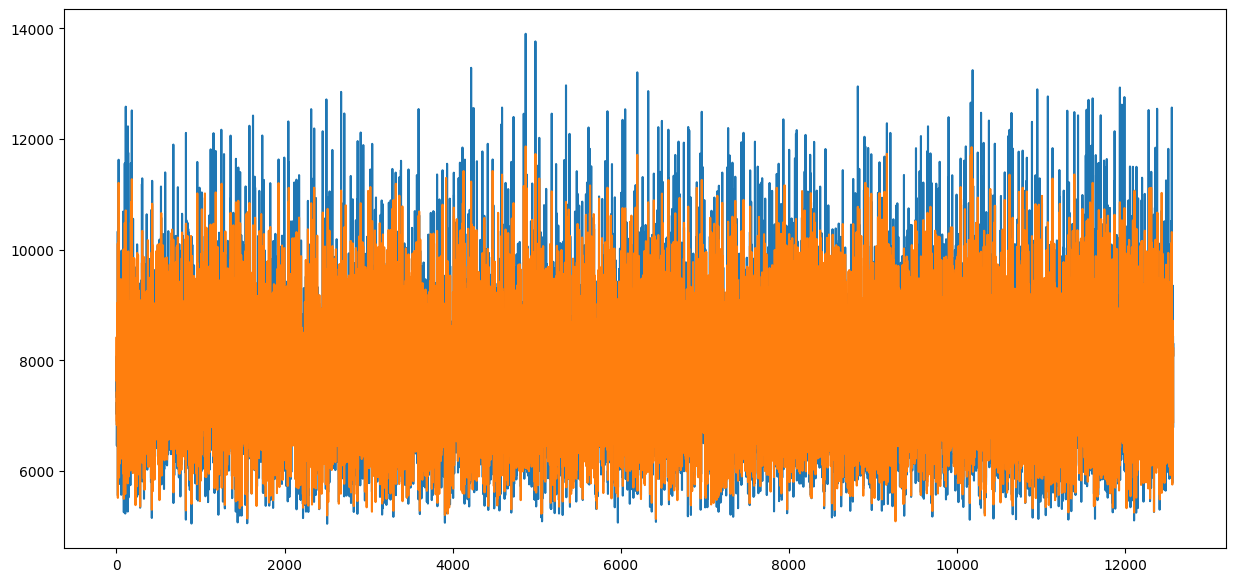

In [57]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot( y_test.values, label='Actual')
ax.plot( model.predict(X_test), label='Predicted')